In [1]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from D_CODE.run_simulation import run as run_SRT
from D_CODE.run_simulation_vi import run as run_DCODE
from toolbox.auxiliary_functions import set_param_freq

from data import equations
from data import SINDy_data

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [12]:
# Select ODE & settings:
ode_name = 'FHN' # help="name of the ode", type=str
ode_param = '0.7,0.8,0.1,1.' # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.0 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0 # help="dimentionality of the parameterizaiton discovery", type=int
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)
time_vector = np.arange(0, ode.T + dt, dt)

In [13]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=n_sample,
                                                                   noise_ratio=noise_ratio,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)
# X_list = SINDy_data.existence_conditions(X_list, ode.init_low, n_variables=dim_x)

# save data:
# file_path = 'saved/data/TVSelkovODE_data.pkl'
# os.makedirs(os.path.dirname(file_path), exist_ok=True)
# with open(file_path, 'wb') as f:
#     dill.dump((X_list, dX_list, param_list, feature_names), f)

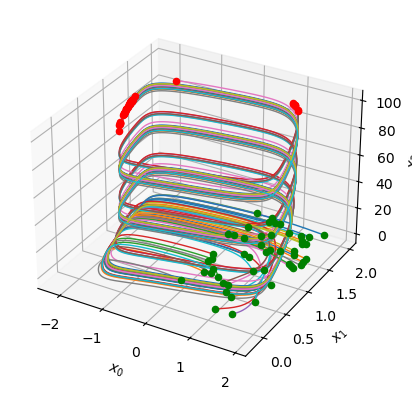

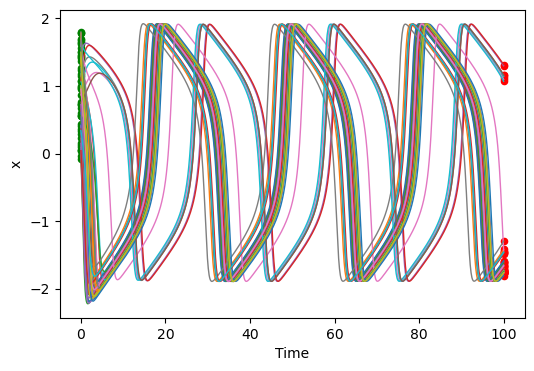

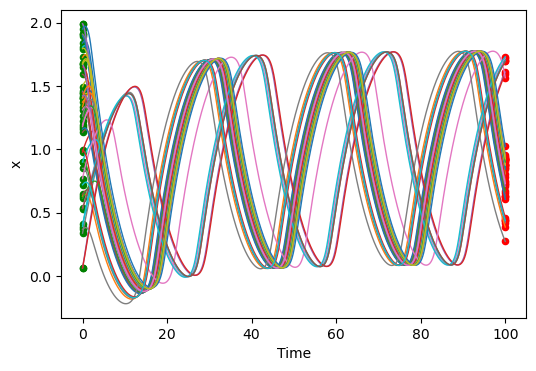

In [14]:
SINDy_data.plot_configuration(np.array(X_list)[:,:,:])
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:1], 100)
SINDy_data.plot_configuration(np.array(X_list)[:,:,1:2], 100)

In [15]:
X_lista = [np.array(x)[0:100, :] for x in X_list]
dX_lista = [np.array(dx)[0:100, :] for dx in dX_list]

model = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=True), optimizer=ps.STLSQ(threshold=0.3))
model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)
print("Estimated SINDy model: ")
model.print()

Estimated SINDy model: 
(X0)' = 0.380 1 + -0.445 X1
(X1)' = 0.000
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.3) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.3) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.3) and eliminated all coefficients
  warnings.warn(
